<a href="https://colab.research.google.com/github/manulrc/rotina/blob/main/Simulador_de_Rotina_de_Estudos_Personalizada_com_Visualiza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Cadastro de Disciplinas

Cadastro de Disponibilidade Semanal

Grade Semanal de Estudos:

--- Tabela Detalhada da Rotina ---
    Dia   Disciplina  Tempo Alocado (h)
Segunda      calculo                4.0
  Terca      calculo                1.0
  Terca   computação                1.0
 Quarta   computação                4.0
 Quinta (Sem estudo)                0.0
  Sexta (Sem estudo)                0.0
 Sabado (Sem estudo)                0.0
Domingo (Sem estudo)                0.0

Total de horas de estudo alocadas: 10.0h
Tempo ocioso: 4.0h restantes

--- Gráficos da Rotina ---


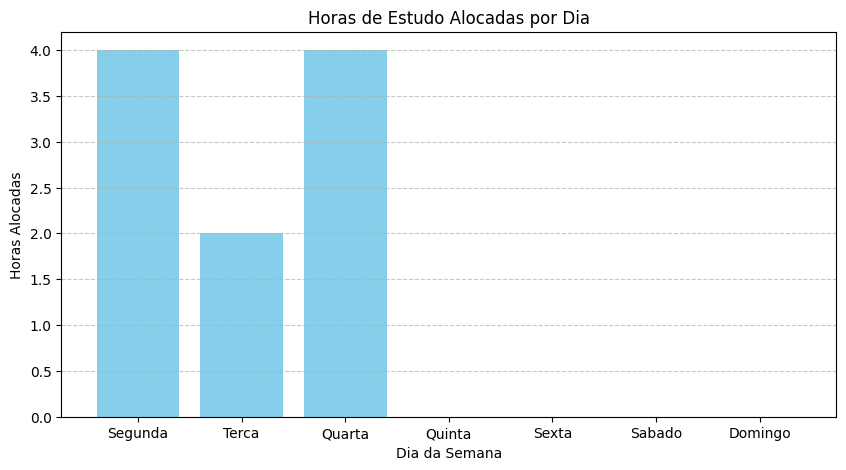

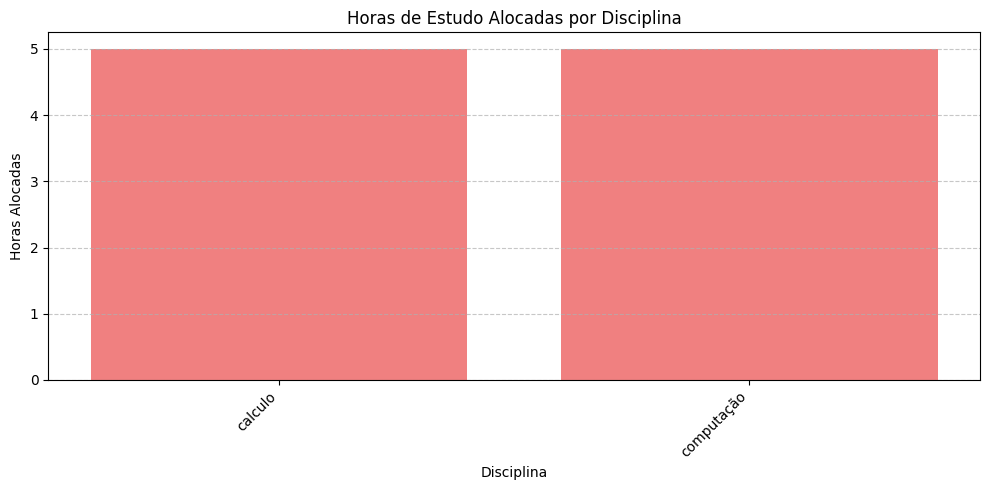

In [ ]:
# Importa as bibliotecas necessárias para geração de PDF, manipulação de dados e visualização
from fpdf import FPDF
import pandas as pd
import matplotlib.pyplot as plt
import io # Para salvar o gráfico em memória antes de adicionar ao PDF

# Entradas predefinidas para teste (mantidas para referência, podem ser usadas para testar rapidamente)
disciplinas_input = {
    "Matemática": 4,
    "Português": 3,
    "História": 2,
    "Física": 3
}

disponibilidade_input = {
    "Segunda": 3,
    "Terca": 2,
    "Quarta": 2,
    "Quinta": 3,
    "Sexta": 2,
    "Sabado": 0,
    "Domingo": 2
}

def cadastrar_disciplinas():
    """
    Permite ao utilizador registar disciplinas e as horas semanais recomendadas para cada uma.
    Retorna um dicionário com as disciplinas e as suas horas.
    """
    disciplinas = {}
    print("\nCadastro de Disciplinas")
    while True:
        nome = input("Nome da disciplina (ou 'fim' para encerrar): ").strip()
        if nome.lower() == 'fim':
            break
        try:
            horas = float(input(f"Horas semanais recomendadas para {nome}: "))
            disciplinas[nome] = horas
        except ValueError:
            print("Entrada inválida. Digite um número.")
    return disciplinas

def cadastrar_disponibilidade():
    """
    Permite ao utilizador registar a disponibilidade de horas de estudo para cada dia da semana.
    Retorna um dicionário com os dias da semana e as horas disponíveis.
    """
    dias = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']
    disponibilidade = {}
    print("\nCadastro de Disponibilidade Semanal")
    for dia in dias:
        try:
            horas = float(input(f"Horas disponíveis em {dia}: "))
            disponibilidade[dia] = horas
        except ValueError:
            print("Entrada inválida. Usando 0h como padrão.")
            disponibilidade[dia] = 0.0
    return disponibilidade

def gerar_rotina(disciplinas, disponibilidade):
    """
    Gera uma rotina de estudos semanal baseada nas disciplinas e na disponibilidade.
    Prioriza a alocação de tempo para as disciplinas.
    Retorna a rotina gerada, o total de horas de estudo alocadas e o total de horas disponíveis.
    """
    total_horas_estudo = sum(disciplinas.values())
    total_disponivel = sum(disponibilidade.values())

    alerta = ""
    if total_disponivel < total_horas_estudo:
        alerta = "[Alerta] Tempo disponível menor que o necessário. Algumas matérias ficarão incompletas."
        print(f"\n{alerta}") # Imprime o alerta na linha de comando

    rotina = {dia: [] for dia in disponibilidade}
    disciplinas_restantes = disciplinas.copy()

    for dia, horas_disponiveis in disponibilidade.items():
        if not disciplinas_restantes:
            break

        for materia in list(disciplinas_restantes):
            if horas_disponiveis <= 0:
                break

            tempo_necessario = disciplinas_restantes[materia]
            tempo_alocado = min(tempo_necessario, horas_disponiveis)

            rotina[dia].append((materia, tempo_alocado))
            horas_disponiveis -= tempo_alocado
            disciplinas_restantes[materia] -= tempo_alocado

            if disciplinas_restantes[materia] <= 0:
                del disciplinas_restantes[materia]

    return rotina, total_horas_estudo, total_disponivel, alerta # Retorna o alerta também

def exibir_rotina(rotina, total_estudo, total_disponivel):
    """
    Exibe a grade semanal de estudos de forma formatada (texto, tabela e gráfico).
    Mostra o total de horas de estudo alocadas e o tempo ocioso restante.
    """
    print("\nGrade Semanal de Estudos:")

    # Preparar dados para DataFrame do Pandas
    data = []
    horas_por_dia = {dia: 0 for dia in rotina}
    horas_por_disciplina = {}

    for dia, estudos in rotina.items():
        if estudos:
            for materia, tempo in estudos:
                data.append({"Dia": dia, "Disciplina": materia, "Tempo Alocado (h)": tempo})
                horas_por_dia[dia] += tempo
                horas_por_disciplina[materia] = horas_por_disciplina.get(materia, 0) + tempo
        else:
            data.append({"Dia": dia, "Disciplina": "(Sem estudo)", "Tempo Alocado (h)": 0})

    df = pd.DataFrame(data)
    print("\n--- Tabela Detalhada da Rotina ---")
    print(df.to_string(index=False)) # Exibe a tabela sem o índice do DataFrame

    print(f"\nTotal de horas de estudo alocadas: {total_estudo:.1f}h")
    tempo_ocioso = total_disponivel - total_estudo
    if tempo_ocioso > 0:
        print(f"Tempo ocioso: {tempo_ocioso:.1f}h restantes")
    else:
        print("Sem tempo ocioso disponível.")

    # --- Visualização Gráfica (Matplotlib) ---
    print("\n--- Gráficos da Rotina ---")

    # Gráfico de Horas por Dia
    plt.figure(figsize=(10, 5))
    dias_ordenados = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']
    horas_dias_ordenadas = [horas_por_dia[dia] for dia in dias_ordenados]

    plt.bar(dias_ordenados, horas_dias_ordenadas, color='skyblue')
    plt.xlabel("Dia da Semana")
    plt.ylabel("Horas Alocadas")
    plt.title("Horas de Estudo Alocadas por Dia")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Gráfico de Horas por Disciplina
    if horas_por_disciplina: # Evita erro se não houver disciplinas
        plt.figure(figsize=(10, 5))
        disciplinas_ordenadas = sorted(horas_por_disciplina.items(), key=lambda item: item[1], reverse=True)
        nomes_disciplinas = [item[0] for item in disciplinas_ordenadas]
        horas_disciplinas = [item[1] for item in disciplinas_ordenadas]

        plt.bar(nomes_disciplinas, horas_disciplinas, color='lightcoral')
        plt.xlabel("Disciplina")
        plt.ylabel("Horas Alocadas")
        plt.title("Horas de Estudo Alocadas por Disciplina")
        plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos para melhor visualização
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout() # Ajusta o layout para evitar sobreposição
        plt.show()
    else:
        print("Não há disciplinas para gerar o gráfico por disciplina.")


def exportar_rotina_pdf(rotina, total_estudo, total_disponivel, alerta, filename="rotina_estudos.pdf"):
    """
    Exporta a grade semanal de estudos para um arquivo PDF, incluindo os gráficos.
    """
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", "B", 16)
    pdf.cell(200, 10, "Simulador de Rotina de Estudos Personalizada", 0, 1, "C")
    pdf.ln(10)

    pdf.set_font("Arial", "", 12)

    if alerta:
        pdf.set_text_color(255, 0, 0) # Cor vermelha para o alerta
        pdf.multi_cell(0, 10, alerta)
        pdf.set_text_color(0, 0, 0) # Volta para cor preta
        pdf.ln(5)

    pdf.set_font("Arial", "B", 14)
    pdf.cell(200, 10, "Grade Semanal de Estudos:", 0, 1, "L")
    pdf.ln(5)

    pdf.set_font("Arial", "", 12)
    for dia, estudos in rotina.items():
        pdf.set_font("Arial", "B", 12)
        pdf.cell(200, 8, f"{dia}:", 0, 1, "L")
        pdf.set_font("Arial", "", 12)
        if estudos:
            for materia, tempo in estudos:
                pdf.cell(200, 7, f"  - {materia}: {tempo:.1f}h", 0, 1, "L")
        else:
            pdf.cell(200, 7, "  (Sem estudo)", 0, 1, "L")
        pdf.ln(2)

    pdf.ln(10)
    pdf.set_font("Arial", "B", 12)
    pdf.cell(200, 8, f"Total de horas de estudo alocadas: {total_estudo:.1f}h", 0, 1, "L")
    tempo_ocioso = total_disponivel - total_estudo
    if tempo_ocioso > 0:
        pdf.cell(200, 8, f"Tempo ocioso: {tempo_ocioso:.1f}h restantes", 0, 1, "L")
    else:
        pdf.cell(200, 8, "Sem tempo ocioso disponível.", 0, 1, "L")

    # Adicionar gráficos ao PDF
    # Gráfico de Horas por Dia
    plt.figure(figsize=(8, 4))
    dias_ordenados = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']
    horas_por_dia_data = {dia: 0 for dia in rotina}
    for dia, estudos in rotina.items():
        for materia, tempo in estudos:
            horas_por_dia_data[dia] += tempo
    horas_dias_ordenadas = [horas_por_dia_data[dia] for dia in dias_ordenados]

    plt.bar(dias_ordenados, horas_dias_ordenadas, color='skyblue')
    plt.xlabel("Dia da Semana")
    plt.ylabel("Horas Alocadas")
    plt.title("Horas de Estudo Alocadas por Dia")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    # Pass the BytesIO object directly and specify the type
    pdf.image(buf, x=10, y=10, w=pdf.w - 20, type='PNG')
    plt.close() # Fecha a figura para liberar memória

    # Gráfico de Horas por Disciplina
    horas_por_disciplina_data = {}
    for dia, estudos in rotina.items():
        for materia, tempo in estudos:
            horas_por_disciplina_data[materia] = horas_por_disciplina_data.get(materia, 0) + tempo

    if horas_por_disciplina_data:
        plt.figure(figsize=(8, 4))
        disciplinas_ordenadas = sorted(horas_por_disciplina_data.items(), key=lambda item: item[1], reverse=True)
        nomes_disciplinas = [item[0] for item in disciplinas_ordenadas]
        horas_disciplinas = [item[1] for item in disciplinas_ordenadas]

        plt.bar(nomes_disciplinas, horas_disciplinas, color='lightcoral')
        plt.xlabel("Disciplina")
        plt.ylabel("Horas Alocadas")
        plt.title("Horas de Estudo Alocadas por Disciplina")
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        # Pass the BytesIO object directly and specify the type
        pdf.image(buf, x=10, y=10, w=pdf.w - 20, type='PNG')
        plt.close()

    pdf.output(filename)
    print(f"\nRotina exportada para {filename}")

# Bloco principal para execução
# Para usar as entradas predefinidas para teste, descomente a linha abaixo e comente as chamadas de cadastrar_disciplinas/disponibilidade:
# disciplinas = disciplinas_input
# disponibilidade = disponibilidade_input

# Para usar entradas do utilizador, descomente as linhas abaixo:
disciplinas = cadastrar_disciplinas()
disponibilidade = cadastrar_disponibilidade()

rotina, total_estudo, total_disponivel, alerta = gerar_rotina(disciplinas, disponibilidade)
exibir_rotina(rotina, total_estudo, total_disponivel)

# Pergunta ao utilizador se deseja exportar para PDF
exportar_opcao = input("\nDeseja exportar a rotina para PDF? (s/n): ").strip().lower()
if exportar_opcao == 's':
    exportar_rotina_pdf(rotina, total_estudo, total_disponivel, alerta)
else:
    print("Exportação para PDF cancelada.")

In [2]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=803a4135b50458649f3bb8e4aadac545eda078ab6990b8fb5a6329ab694833cf
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf
